In [1]:
#From the dataset_31_credit-g.arff file:
#"Two datasets are provided. The original dataset, in the form provided
# by Prof. Hofmann, contains categorical/symbolic attributes and is in the file "german.data". 

# For algorithms that need numerical attributes, Strathclyde University  produced the file
# "german.data-numeric".  This file has been edited and several indicator variables added
# to make it suitable for algorithms which cannot cope with categorical variables.
# Several attributes that are ordered categorical (such as attribute 17) have
# been coded as integer. This was the form used by StatLog."



##TODO: check what version we are working with

# Loading data

In [2]:
import pandas as pd
import seaborn as sns
from scipy.io.arff import loadarff
import matplotlib.pyplot as plt

raw_data = loadarff("dataset_31_credit-g.arff")
df_data = pd.DataFrame(raw_data[0])

df_data.head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'


# Convert data to correct format

In [3]:
for col, dtype in df_data.dtypes.items():
    if dtype == object:  # Only process byte object columns.
        df_data[col] = df_data[col].apply(lambda x: x.decode("utf-8"))

# EDA

## Types and structure

In [4]:
df_data.head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [6]:
df_data.nunique()

checking_status             4
duration                   33
credit_history              5
purpose                    10
credit_amount             921
savings_status              5
employment                  5
installment_commitment      4
personal_status             4
other_parties               3
residence_since             4
property_magnitude          4
age                        53
other_payment_plans         3
housing                     3
existing_credits            4
job                         4
num_dependents              2
own_telephone               2
foreign_worker              2
class                       2
dtype: int64

In [7]:
for col in df_data.select_dtypes(include=[object]):
    print(f" Column {col}, has options:, {df_data[col].unique()}")

 Column checking_status, has options:, ['<0' '0<=X<200' 'no checking' '>=200']
 Column credit_history, has options:, ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']
 Column purpose, has options:, ['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']
 Column savings_status, has options:, ['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']
 Column employment, has options:, ['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']
 Column personal_status, has options:, ['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']
 Column other_parties, has options:, ['none' 'guarantor' 'co applicant']
 Column property_magnitude, has options:, ['real estate' 'life insurance' 'no known property' 'car']
 Column other_payment_plans, has options:, ['none' 'bank' 'stores']
 Column housing, has options:, ['own' 'for free' 'rent']
 Column job, has options:, ['

In [8]:
df_data.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


### Features:
| Feature                | Type        | Description                                              | Number of unique values |
|------------------------|-------------|----------------------------------------------------------|-------------------------|
| checking_status        | qualitative | Status of existing checking account                      | 4                       |
| duration               | numeric     | Duration in months                                       | 33                      |
| credit_history         | qualitative | Credit history                                           | 5                       |
| purpose                | qualitative | Purpose                                                  | 10                      |
| credit_amount          | numeric     | Credit amount                                            | 921                     |
| saving_status          | qualitative | Savings account/bond                                     | 5                       |
| employment             | qualitative | Present employment since                                 | 5                       |
| installment_commitment | numeric     | Installment rate in percentage of disposable income      | 4                       |
| personal_status        | qualitative | Personal status and sex                                  | 4                       |
| other_parties          | qualitative | Other debtors / guarantors                               | 3                       |
| residence_since        | numeric     | Present residence since                                  | 4                       |
| property_magnitude     | qualitative | Property                                                 | 4                       |
| age                    | numeric     | Age in years                                             | 53                      |
| other_payment_plans    | qualitative | Other installment payments                               | 3                       |
| housing                | qualitative | Housing                                                  | 3                       |
| existing_credits       | numeric     | Number of existing credits at this bank                  | 4                       |
| job                    | qualitative | Job                                                      | 4                       |
| num_dependents         | numeric     | Number of people being liable to provide maintenance for | 2                       |
| own_telephone          | qualitative | Telephone                                                | 2                       |
| foreign_worker         | qualitative | Foreign worker                                           | 2                       |

### Outcome:
Class: good or bad (qualitative)

This dataset contains a custom cost matrix:
|       | Good | Bad |
|-------|------|-----|
| Good  |  0   |  1  |
| Bad   |  5   |  0    

The columns are the predicted class and the rows are the actual assigned class (so the true label).

What does this mean? It means that it is worse to classify a customer as good when they are actually bad compared to classifying a customer as bad when they are actually good.
This is probably because when a customer is classified as good when they are actually bad, they will not be able to pay back the credit.

## Visualizations

In [9]:
from collections import Counter
Counter(df_data['class'])

Counter({'good': 700, 'bad': 300})

<Axes: xlabel='duration', ylabel='Count'>

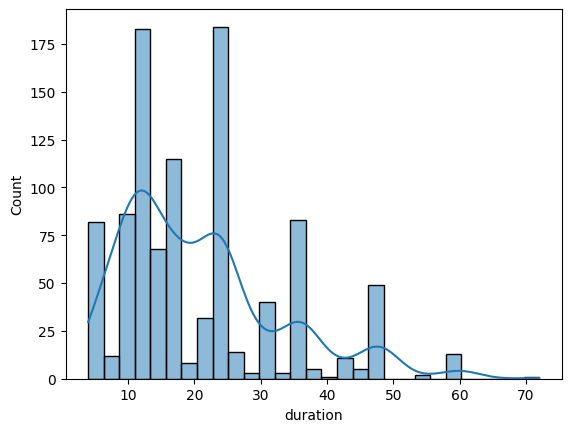

In [10]:
sns.histplot(df_data, x="duration", kde=True)

<Axes: xlabel='duration', ylabel='Count'>

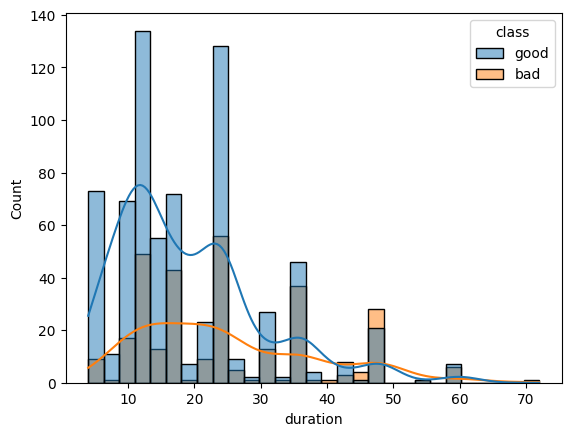

In [11]:
from collections import Counter
#Counter(df_data["duration"])

sns.histplot(df_data, x="duration", kde=True, hue="class")

<Axes: xlabel='age', ylabel='Count'>

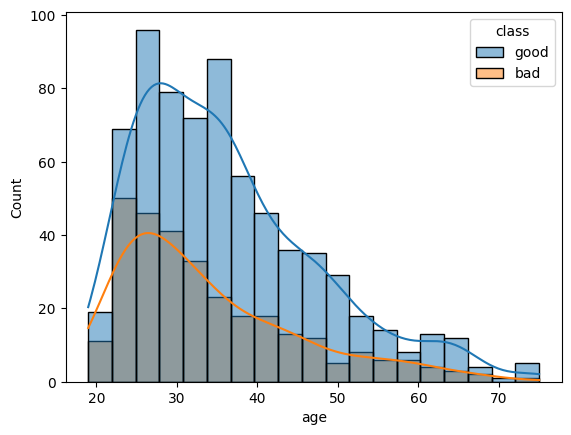

In [12]:
from collections import Counter
#Counter(df_data["duration"])

sns.histplot(df_data, x="age", kde=True, hue="class")

Text(0.5, 1.0, 'Duration vs Credit Amount based on Class')

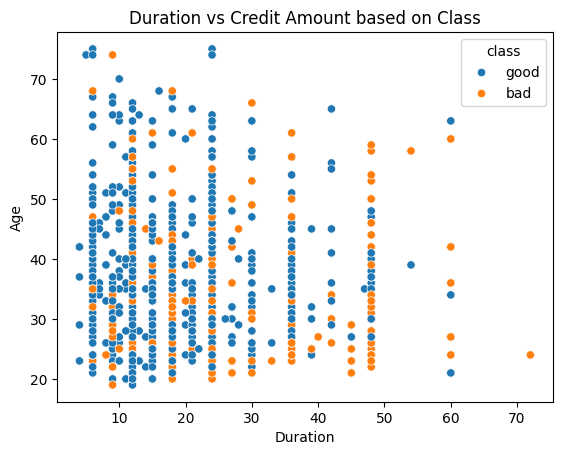

In [13]:
sns.scatterplot(data=df_data, x="duration", y="age", hue="class")
plt.xlabel('Duration')
plt.ylabel('Age')
plt.title('Duration vs Credit Amount based on Class')

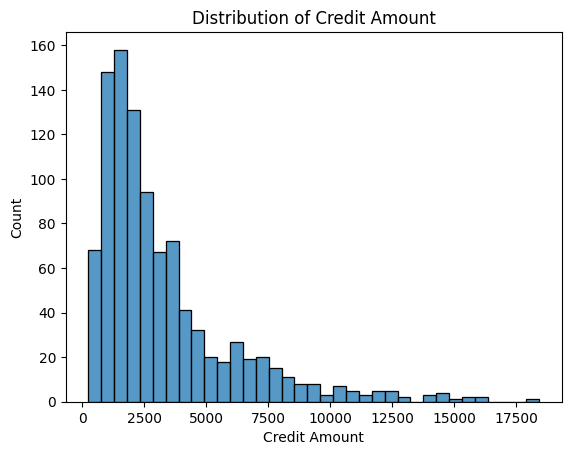

In [14]:
sns.histplot(df_data['credit_amount'])
plt.xlabel('Credit Amount')
plt.ylabel('Count')
plt.title('Distribution of Credit Amount')
plt.show()

Let's check the values above 15,000 credit

In [15]:
df_data[df_data['credit_amount'] > 15000]

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
95,0<=X<200,54.0,no credits/all paid,business,15945.0,<100,<1,3.0,male single,none,...,no known property,58.0,none,rent,1.0,skilled,1.0,yes,yes,bad
637,no checking,60.0,delayed previously,radio/tv,15653.0,<100,4<=X<7,2.0,male single,none,...,car,21.0,none,own,2.0,skilled,1.0,yes,yes,good
818,<0,36.0,existing paid,other,15857.0,<100,unemployed,2.0,male div/sep,co applicant,...,car,43.0,none,own,1.0,high qualif/self emp/mgmt,1.0,none,yes,good
887,0<=X<200,48.0,existing paid,business,15672.0,<100,1<=X<4,2.0,male single,none,...,car,23.0,none,own,1.0,skilled,1.0,yes,yes,bad
915,0<=X<200,48.0,no credits/all paid,other,18424.0,<100,1<=X<4,1.0,female div/dep/mar,none,...,life insurance,32.0,bank,own,1.0,high qualif/self emp/mgmt,1.0,yes,no,bad


--> Maybe remove these last 5?

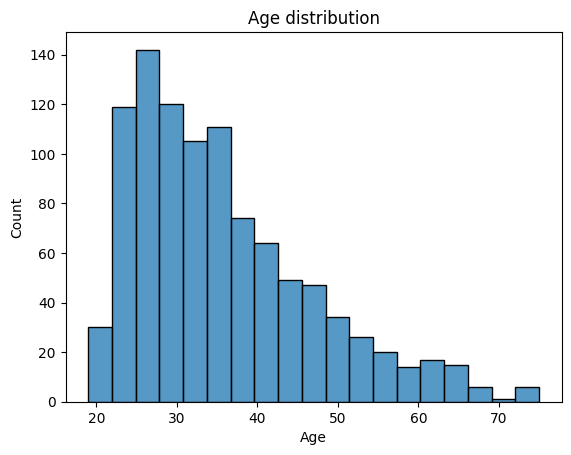

In [16]:
sns.histplot(data=df_data, x='age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution')
plt.show()

In [17]:
df_data[df_data['age'] > 70]

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
186,0<=X<200,9.0,all paid,used car,5129.0,<100,>=7,2.0,female div/dep/mar,none,...,no known property,74.0,bank,for free,1.0,high qualif/self emp/mgmt,2.0,yes,yes,bad
330,<0,24.0,critical/other existing credit,used car,6615.0,<100,unemployed,2.0,male single,none,...,no known property,75.0,none,for free,2.0,high qualif/self emp/mgmt,1.0,yes,yes,good
430,no checking,5.0,existing paid,business,3448.0,<100,4<=X<7,1.0,male single,none,...,real estate,74.0,none,own,1.0,unskilled resident,1.0,none,yes,good
536,<0,6.0,existing paid,new car,1374.0,no known savings,unemployed,4.0,female div/dep/mar,none,...,life insurance,75.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
606,no checking,24.0,critical/other existing credit,business,4526.0,<100,1<=X<4,3.0,male single,none,...,real estate,74.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
756,>=200,6.0,critical/other existing credit,new car,1299.0,<100,1<=X<4,1.0,male single,none,...,real estate,74.0,none,own,3.0,unemp/unskilled non res,2.0,none,no,good


No real outliers here :)

### Correlations

<Axes: >

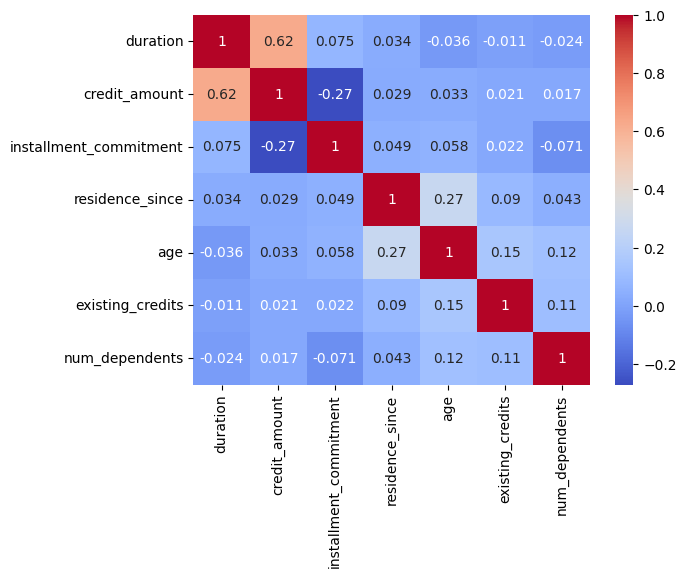

In [18]:
sns.heatmap(df_data.corr(numeric_only=True), annot = True, fmt=".2g",cmap= "coolwarm")

#### Duration and credit amount (+0.62)

Text(0.5, 1.0, 'Duration vs Credit Amount based on Class')

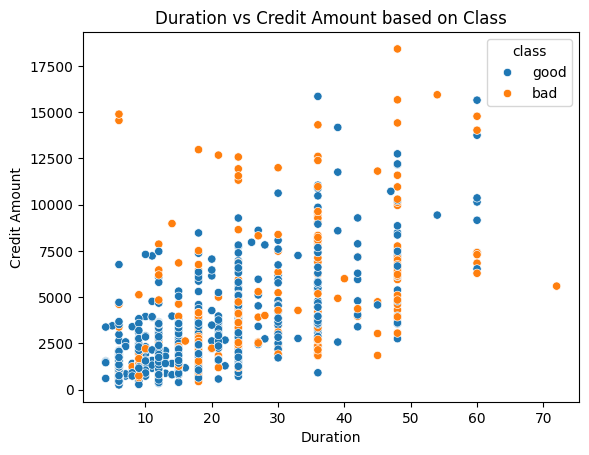

In [19]:
sns.scatterplot(data=df_data, x="duration", y="credit_amount", hue="class")
plt.xlabel('Duration')
plt.ylabel('Credit Amount')
plt.title('Duration vs Credit Amount based on Class')

#### Credit amount and installment commitment (-0.27)

<Axes: xlabel='credit_amount', ylabel='installment_commitment'>

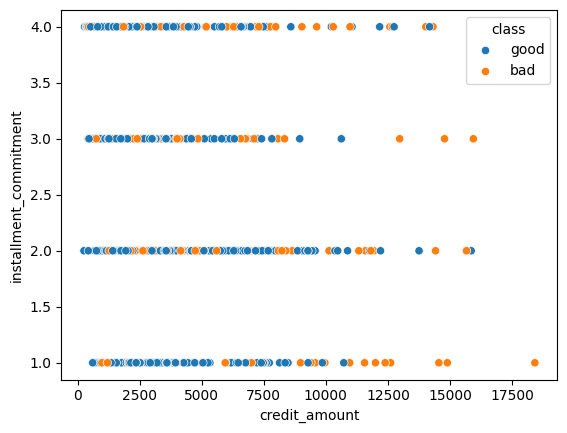

In [20]:
sns.scatterplot(data=df_data, x="credit_amount", y="installment_commitment", hue="class")

In [21]:
#sns.scatterplot(data=df_data, x="installment_commitment", y="credit_amount", hue="class") # transposed

#### Age and residence since (+0.27)

<Axes: xlabel='age', ylabel='residence_since'>

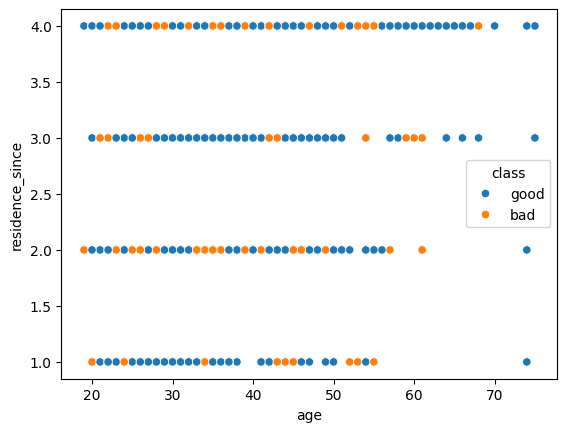

In [22]:
sns.scatterplot(data=df_data, x="age", y="residence_since", hue="class")

In [23]:
#sns.scatterplot(data=df_data, x="age", y="residence_since", hue="class") # transposed

### Gender bias

To investigate if there is a gender bias, we should carefully examine the personal_status feature. This features was merged from personal status and gender:
- A91: 'male div/sep'
- A92: 'female div/dep/mar'
- A93: 'male single'
- A94: 'male mar/wid'
- A95: 'female single'

Let's check the distribution first!

In [24]:
from collections import Counter
Counter(df_data["personal_status"])

Counter({'male single': 548,
         'female div/dep/mar': 310,
         'male mar/wid': 92,
         'male div/sep': 50})

Let"s extract the gender from the column for investigation.

In [25]:
genders = []
male_string = "male"
female_string = "female"

for status in df_data["personal_status"].values:
    if female_string in status:
        genders.append(female_string)
    elif male_string in status:
        genders.append(male_string)
    else:
        print("Found something interesting!")
        # This should no be printed because the definition of the data says that only "male"/"female" was an option
        # But it is good to have this here to check if the data is consistent

df_data["gender"] = genders

In [26]:
#Disabled this plot, as it normalized the gender dependently on each other.
#We wanted to see what the credit amount distribution was independently of the gender

#sns.displot(data=df_data, x="credit_amount", hue="gender", kind="kde")
#plt.xlabel('Credit Amount')
#plt.ylabel('Density')
#plt.title('Distribution of Credit Amount by Gender')
#plt.legend()
#plt.show()

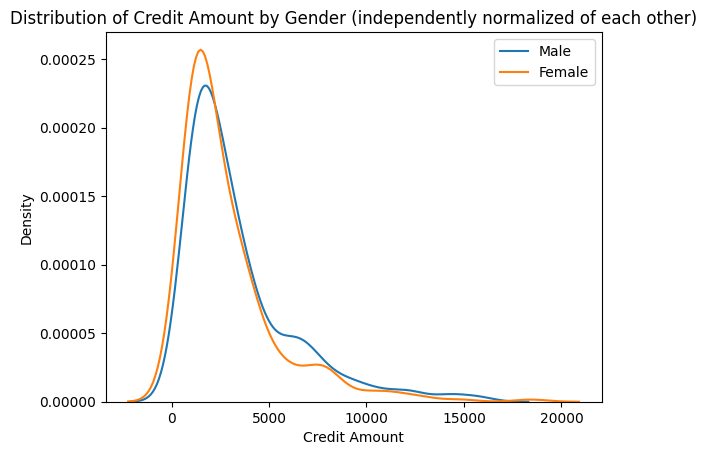

In [27]:
sns.kdeplot(data=df_data[df_data['gender'] == 'male'], x='credit_amount', label='Male')
sns.kdeplot(data=df_data[df_data['gender'] == 'female'], x='credit_amount', label='Female')
plt.xlabel('Credit Amount')
plt.ylabel('Density')
plt.title('Distribution of Credit Amount by Gender (independently normalized of each other)')
plt.legend()
plt.show()

Proportion of male that have good credit: 0.7231884057971014
Proportion of female that have good credit: 0.6483870967741936


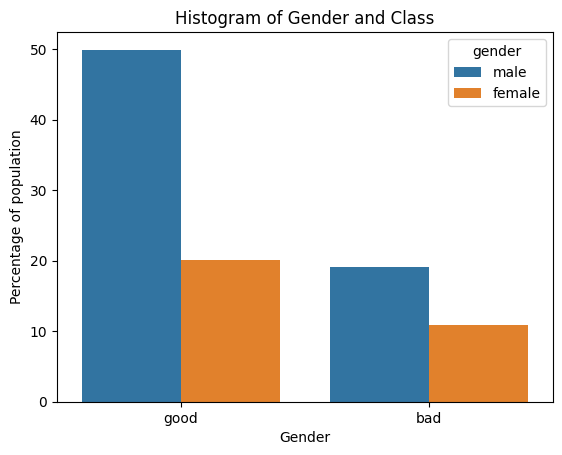

In [37]:
df_male_class = df_data[df_data["gender"]=="male"]["class"]
prop_male = df_male_class.value_counts()["good"]/len(df_male_class)
print('Proportion of male that have good credit:', prop_male)

df_female_class = df_data[df_data["gender"]=="female"]["class"]
prop_female = df_female_class.value_counts()["good"]/len(df_female_class)
print('Proportion of female that have good credit:', prop_female)

sns.countplot(data=df_data, x='class', hue='gender', stat="percent")
plt.xlabel('Gender')
plt.ylabel('Percentage of population')
plt.title('Histogram of Gender and Class')
plt.show()

chi-square test

### Foreign worker bias

We need to investigate if there is a bias based on the fact that a person is a worker coming from abroad.

The foreign worker values are:
- A201: yes
- A202: no

In [29]:
from collections import Counter
Counter(df_data["foreign_worker"])

Counter({'yes': 963, 'no': 37})

There is a very heavy imbalance to foreign workers in this dataset, as we already knew from the description.

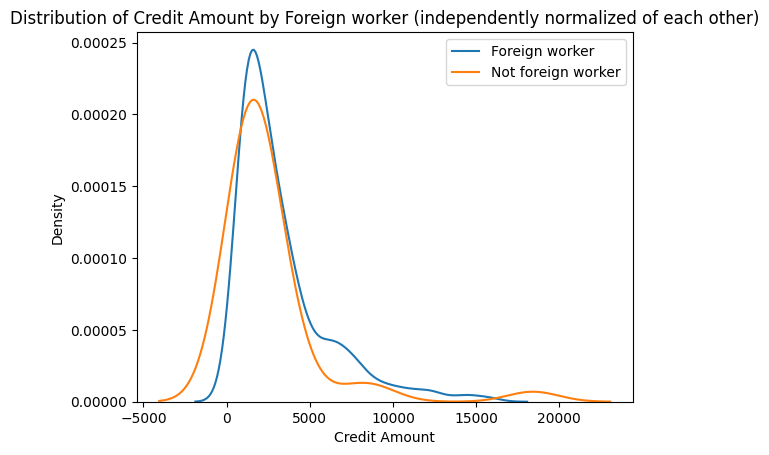

In [30]:
sns.kdeplot(data=df_data[df_data['foreign_worker'] == 'yes'], x='credit_amount', label='Foreign worker')
sns.kdeplot(data=df_data[df_data['foreign_worker'] == 'no'], x='credit_amount', label='Not foreign worker')
plt.xlabel('Credit Amount')
plt.ylabel('Density')
plt.title('Distribution of Credit Amount by Foreign worker (independently normalized of each other)')
plt.legend()
plt.show()

Proportion of foreign workers that have good credit: 0.6926272066458983
Proportion of not foreign workers that have good credit: 0.8918918918918919


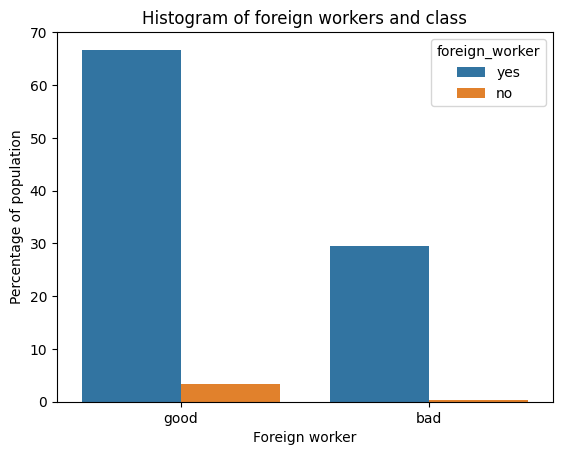

In [31]:
df_foreign_class = df_data[df_data["foreign_worker"]=="yes"]["class"]
prop_foreign = df_foreign_class.value_counts()["good"]/len(df_foreign_class)
print('Proportion of foreign workers that have good credit:', prop_foreign)

df_not_foreign_class = df_data[df_data["foreign_worker"]=="no"]["class"]
prop_not_foreign = df_not_foreign_class.value_counts()["good"]/len(df_not_foreign_class)
print('Proportion of not foreign workers that have good credit:', prop_not_foreign)

sns.countplot(data=df_data, x='class', hue='foreign_worker', stat="percent")
plt.xlabel('Foreign worker')
plt.ylabel('Percentage of population')
plt.title('Histogram of foreign workers and class')
plt.show()

In [44]:
Counter(df_data["foreign_worker"])

Counter({'yes': 963, 'no': 37})

In [43]:
df_not_foreign_class.value_counts()

class
good    33
bad      4
Name: count, dtype: int64

### Other viz

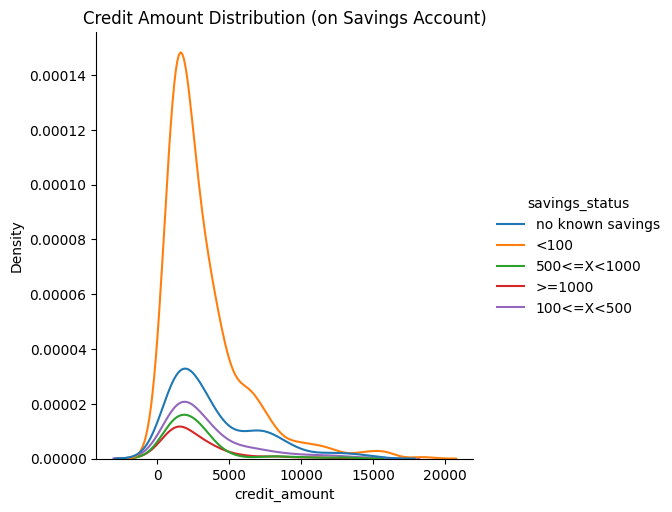

In [32]:
sns.displot(df_data, x="credit_amount", kind="kde", hue="savings_status")
#sns.displot(df_data, x="credit_amount", kind="kde")
plt.title("Credit Amount Distribution (on Savings Account)")
plt.show()

### Age bias:

According to [IBM AI Fairness 360](https://nbviewer.org/github/Trusted-AI/AIF360/blob/main/examples/tutorial_credit_scoring.ipynb), there is a bias in age.
Let's have a look.

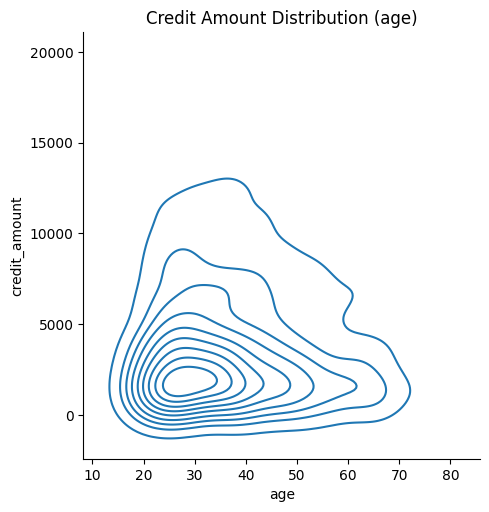

In [33]:
sns.displot(df_data, x="age", y="credit_amount", kind="kde")
#sns.displot(df_data, x="credit_amount", y="age", kind="kde") #transposed
plt.title("Credit Amount Distribution (age)")
plt.show()

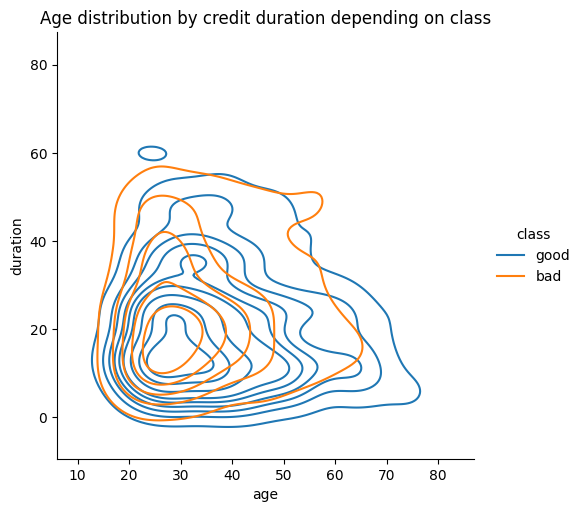

In [34]:
sns.displot(df_data, x="age", y="duration", hue="class", kind="kde")
plt.title("Age distribution by credit duration depending on class")
plt.show()

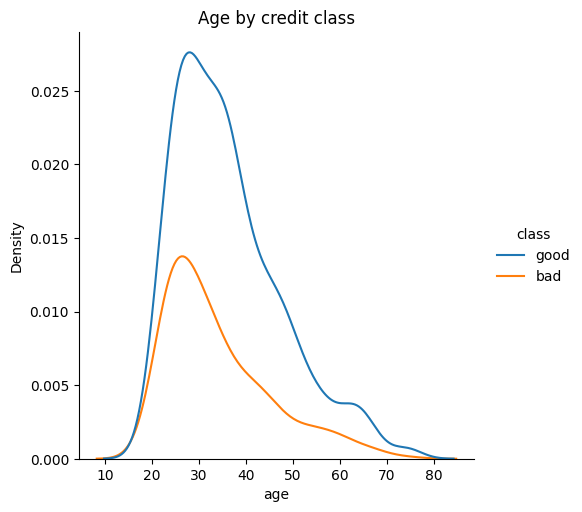

In [35]:
sns.displot(df_data, x="age", hue="class", kind="kde")
#sns.displot(df_data, x="credit_amount", y="age", kind="kde") #transposed
plt.title("Age by credit class")
plt.show()

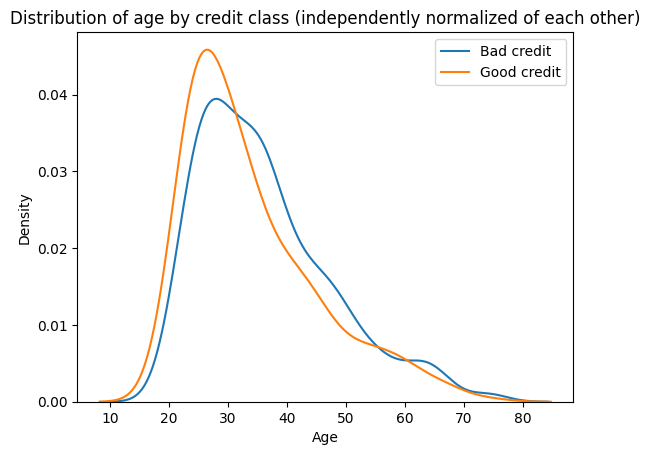

In [36]:
sns.kdeplot(data=df_data[df_data['class'] == 'good'], x='age', label='Bad credit')
sns.kdeplot(data=df_data[df_data['class'] == 'bad'], x='age', label='Good credit')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of age by credit class (independently normalized of each other)')
plt.legend()
plt.show()